In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the specified file path, using ISO-8859-1 encoding to handle special characters.
df = pd.read_csv(r'C:\Users\FRIMAKK\Downloads\archive\spotify-2023.csv', encoding='ISO-8859-1')

In [2]:
# Display basic information about the dataset, including its shape, data types, and the number of missing values in each column.
print(f"Dataset shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")
print(f"Null values:\n{df.isnull().sum()}")

Dataset shape: (953, 24)
Data types:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object
Null values:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_

In [3]:
# Convert the 'streams' column to numeric values, setting any errors (non-numeric values) to NaN, and display the updated data type.
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
print(f"Updated data type of 'streams' column: {df['streams'].dtypes}")

Updated data type of 'streams' column: float64


In [4]:
# Calculate and display basic statistics (mean, median, standard deviation) for the 'streams' column.
mean_streams = df['streams'].mean()
median_streams = df['streams'].median()
std_streams = df['streams'].std()
print(f"Mean: {mean_streams}")
print(f"Median: {median_streams}")
print(f"Standard Deviation: {std_streams}")


Mean: 514137424.93907565
Median: 290530915.0
Standard Deviation: 566856949.0388832


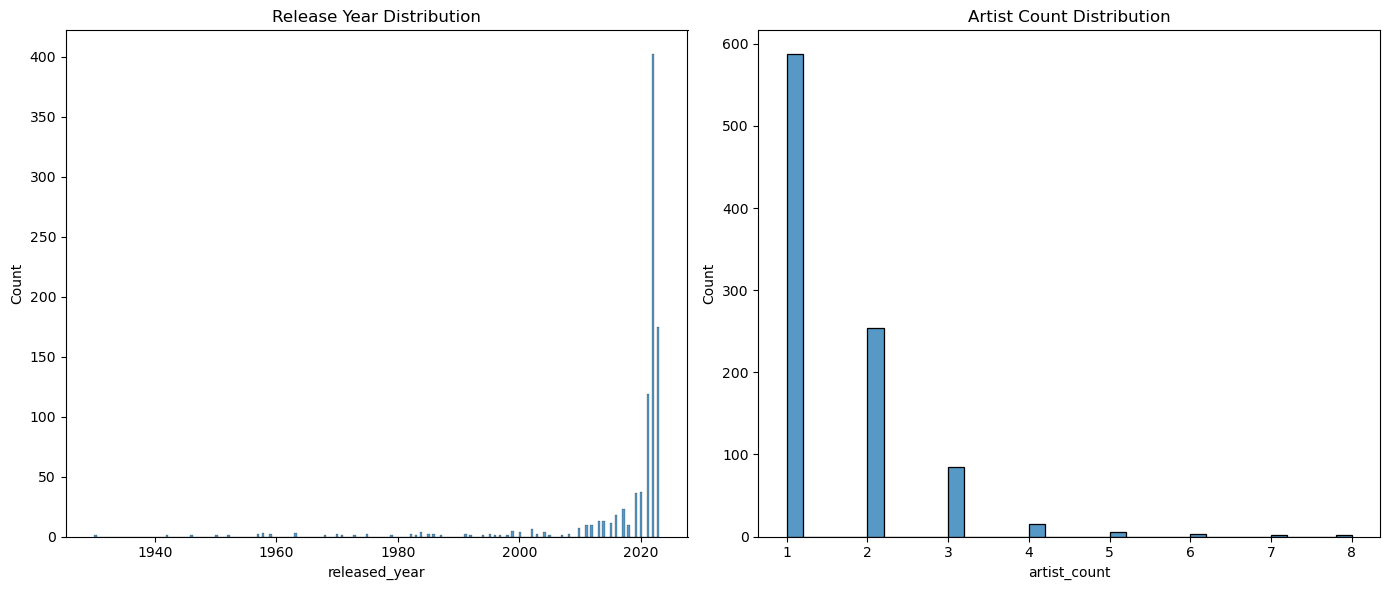

In [5]:
# Plot the distribution of release years and artist count side by side for comparison using histograms.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['released_year'], kde=False, ax=axes[0]).set(title='Release Year Distribution')
sns.histplot(df['artist_count'], kde=False, ax=axes[1]).set(title='Artist Count Distribution')
plt.tight_layout()
plt.show()

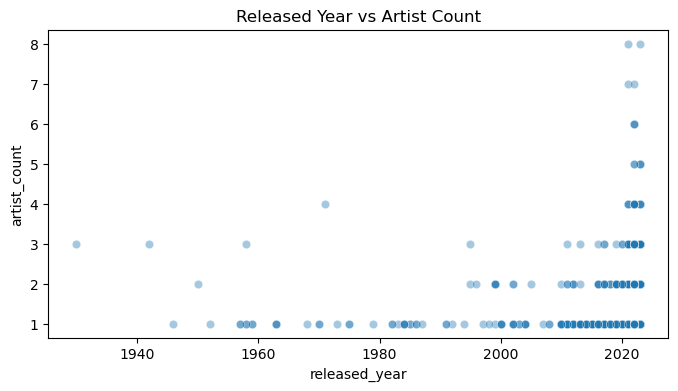

In [6]:
# Plot a scatter plot showing the relationship between the release year and artist count, with reduced opacity for better visibility.
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='released_year', y='artist_count', alpha=0.4)
plt.title('Released Year vs Artist Count')
plt.show()

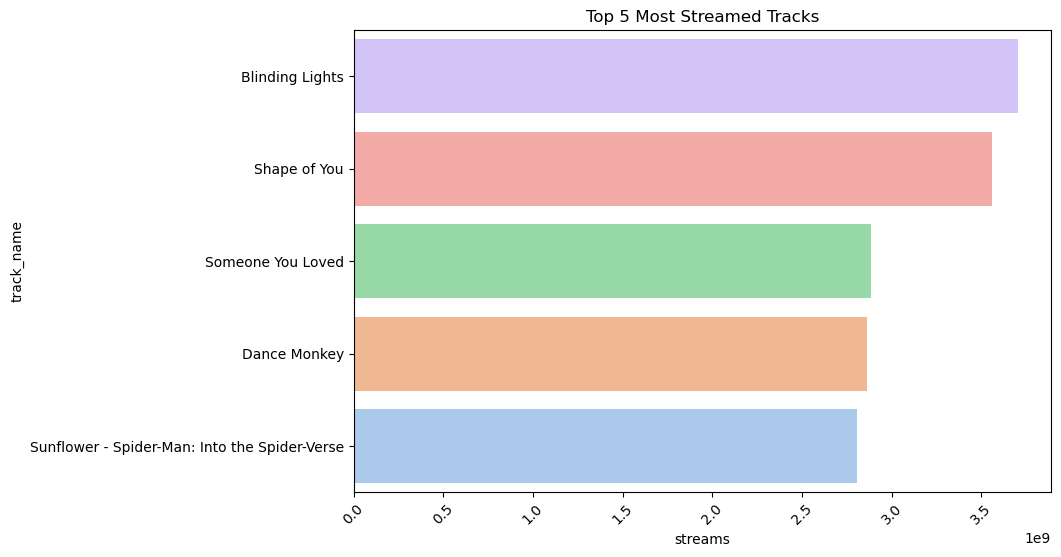

In [7]:
# Identify and plot the top 5 tracks by the highest stream count using a horizontal bar plot.
top_tracks = df.sort_values(by='streams', ascending=False).head()
plt.figure(figsize=(9, 6))
sns.barplot(x='streams', y='track_name', data=top_tracks, hue='streams', palette='pastel', legend=False)
plt.title('Top 5 Most Streamed Tracks')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Display the top 5 artists with the most tracks in the dataset by counting the frequency of their appearances in the 'artist(s)_name' column.
top_artists = df['artist(s)_name'].value_counts().head().index.tolist()
print(f"Top 5 Artists: {top_artists}")


Top 5 Artists: ['Taylor Swift', 'The Weeknd', 'Bad Bunny', 'SZA', 'Harry Styles']


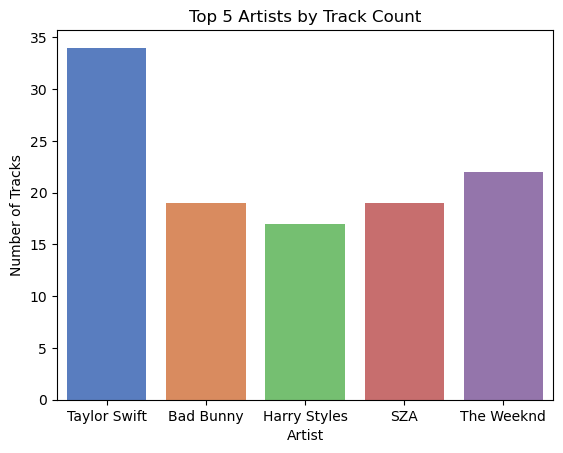

In [9]:
# Filter the dataset for the top 5 artists and plot the number of tracks for each artist using a count plot.
top_artists_data = df[df['artist(s)_name'].isin(top_artists)]
sns.countplot(x='artist(s)_name', data=top_artists_data, hue='artist(s)_name', palette='muted', legend=False)
plt.title('Top 5 Artists by Track Count')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.show()

In [10]:
# Calculate and display the year with the highest number of tracks, as well as the count of tracks released in that year.
release_year_counts = df['released_year'].value_counts().reset_index()
release_year_counts.columns = ['Year', 'Track Count']
max_year = release_year_counts.loc[release_year_counts['Track Count'].idxmax(), 'Year']
max_tracks = release_year_counts['Track Count'].max()
print(f"Year with most tracks: {max_year} ({max_tracks} tracks)")

Year with most tracks: 2022 (402 tracks)


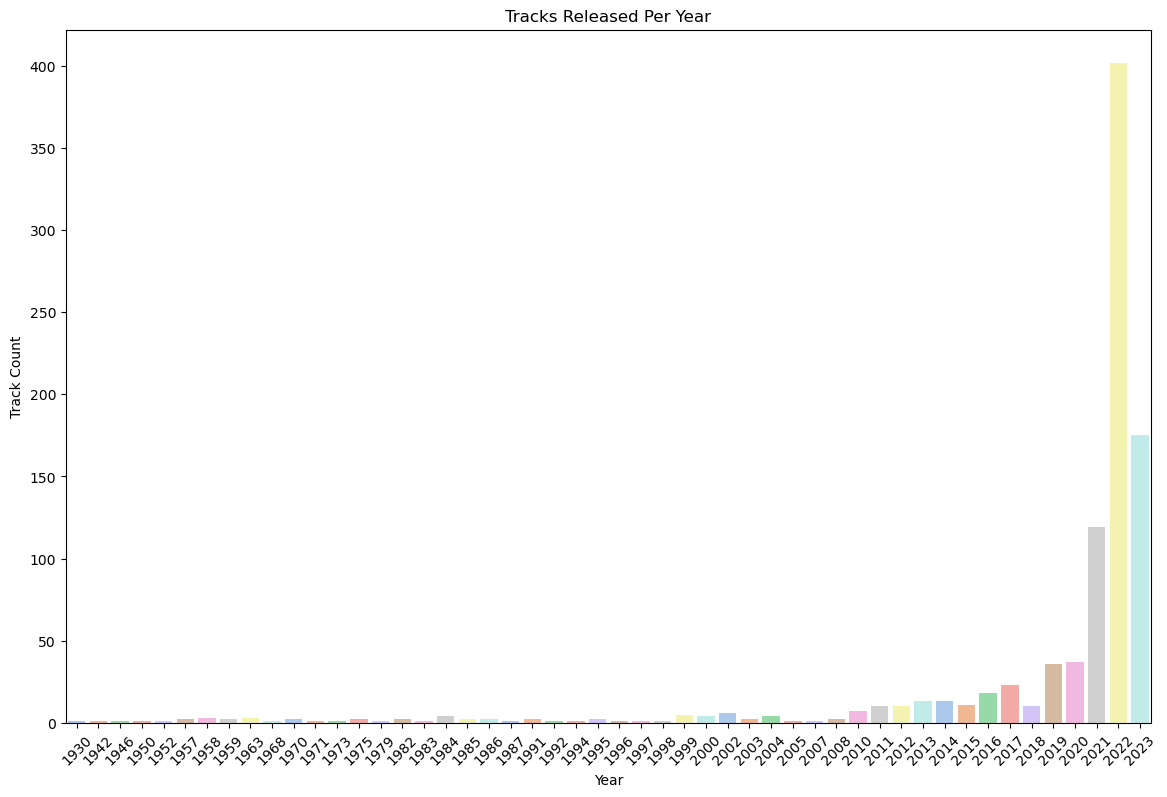

In [11]:
# Plot the number of tracks released each year using a bar plot, highlighting the track count for each year.
plt.figure(figsize=(14, 9))
sns.barplot(data=release_year_counts, x='Year', y='Track Count', hue='Year', palette='pastel', legend=False)
plt.title('Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Track Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Calculate and display the month with the highest number of releases, then plot the number of releases per month in a bar plot.
month_counts = df['released_month'].value_counts().reset_index()
month_counts.columns = ['Month', 'Track Count']
month_counts['Month'] = month_counts['Month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})
max_month = month_counts.loc[month_counts['Track Count'].idxmax(), 'Month']
max_month_tracks = month_counts['Track Count'].max()
print(f"Month with highest releases: {max_month} ({max_month_tracks} tracks)")

Month with highest releases: January (134 tracks)


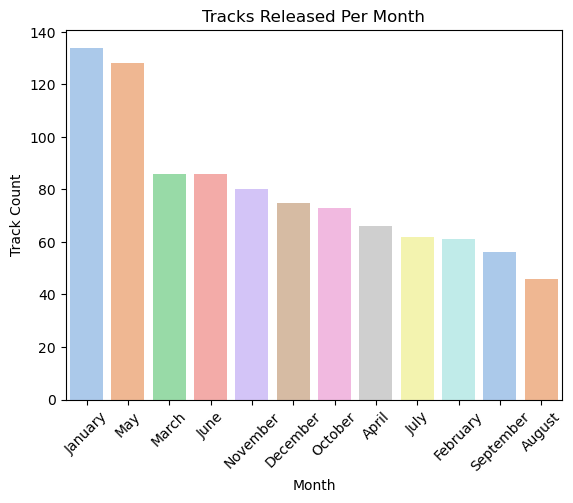

In [13]:
# Plot the number of tracks released each month using a bar plot, with months displayed in order.
sns.barplot(data=month_counts, x='Month', y='Track Count', hue='Month', palette='pastel', legend=False)
plt.title('Tracks Released Per Month')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

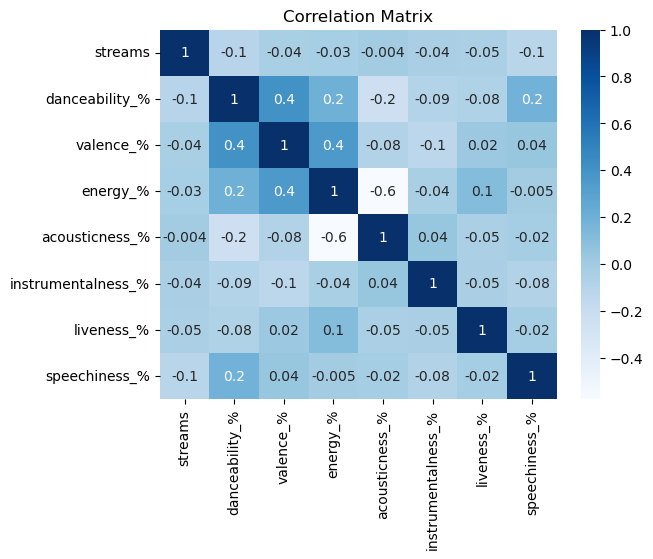

In [14]:
# Calculate and display the correlation matrix between streams and other features such as danceability, energy, and valence.
correlation_matrix = df[['streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".1g")
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Calculate and print the correlation between specific features, such as danceability vs. energy and valence vs. acousticness.
dance_energy_corr = df[['danceability_%', 'energy_%']].corr()
valence_acoustic_corr = df[['valence_%', 'acousticness_%']].corr()
print(f"Danceability vs. Energy:\n{dance_energy_corr}")
print(f"Valence vs. Acousticness:\n{valence_acoustic_corr}")

Danceability vs. Energy:
                danceability_%  energy_%
danceability_%        1.000000  0.198095
energy_%              0.198095  1.000000
Valence vs. Acousticness:
                valence_%  acousticness_%
valence_%        1.000000       -0.081907
acousticness_%  -0.081907        1.000000


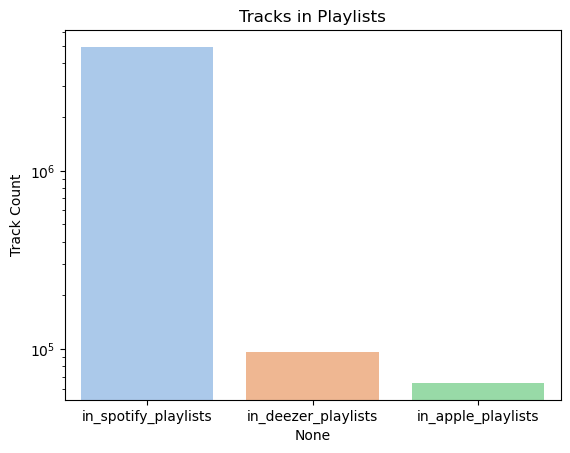

In [16]:
# Analyze the number of tracks featured in different playlists and plot the total count using a bar plot.
playlist_counts = df[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].apply(pd.to_numeric, errors='coerce').sum()
sns.barplot(x=playlist_counts.index, y=playlist_counts.values, hue=playlist_counts.index, palette='pastel', legend=False)
plt.title('Tracks in Playlists')
plt.ylabel('Track Count')
plt.yscale('log')
plt.show()

In [17]:
# Display information about the top 5 tracks that appear in multiple playlists across platforms.
top_playlist_tracks = df.loc[[55, 179, 86, 620, 41], ['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']]
print(top_playlist_tracks)

                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

     in_spotify_playlists in_deezer_playlists  in_apple_playlists  
55                  43899               3,421                 672  
179                 32181               6,808                  33  
86                  17836               1,800                 440  
620                 24529               3,595                 533  
41                  24094                 843                 372  


In [18]:
# Calculate and display the average number of streams for each mode and key combination, sorted by streams.
average_streams = df.groupby(['mode', 'key'])['streams'].mean().reset_index()
sorted_streams = average_streams.sort_values(by='streams', ascending=False)
print(f"Average streams by mode and key:\n{sorted_streams}")

Average streams by mode and key:
     mode key       streams
6   Major   E  7.605963e+08
5   Major  D#  6.819623e+08
3   Major  C#  6.285883e+08
1   Major  A#  6.275336e+08
19  Minor  F#  5.954921e+08
13  Minor   B  5.825110e+08
4   Major   D  5.720180e+08
14  Minor  C#  5.665252e+08
10  Major  G#  5.458044e+08
7   Major   F  5.279311e+08
17  Minor   E  5.083264e+08
9   Major   G  4.929813e+08
12  Minor  A#  4.849231e+08
16  Minor  D#  4.793647e+08
2   Major   B  4.363336e+08
8   Major  F#  4.175450e+08
11  Minor   A  4.173906e+08
18  Minor   F  4.102836e+08
0   Major   A  4.019603e+08
20  Minor   G  3.637593e+08
15  Minor   D  3.425588e+08
21  Minor  G#  3.219036e+08


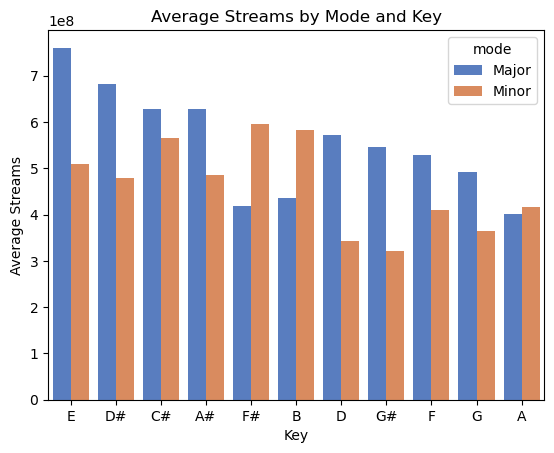

In [19]:
# Plot the average streams for each key, broken down by mode, using a bar plot.
sns.barplot(data=sorted_streams, x='key', y='streams', hue='mode', palette='muted')
plt.title('Average Streams by Mode and Key')
plt.xlabel('Key')
plt.ylabel('Average Streams')
plt.show()

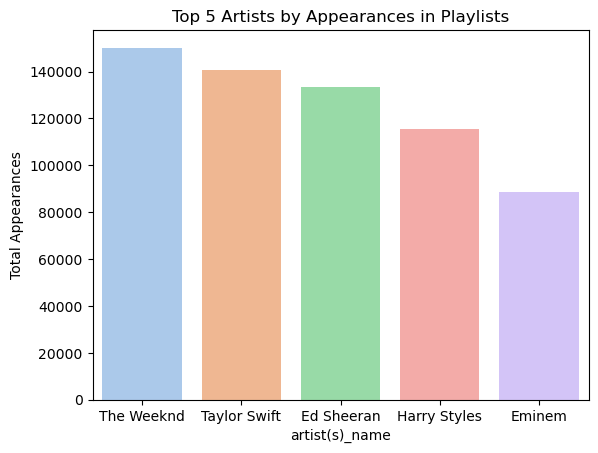

In [20]:
# Aggregate the number of appearances of artists across various platforms and plot the top 5 artists with the most appearances.
playlist_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
df[playlist_columns] = df[playlist_columns].apply(pd.to_numeric, errors='coerce')
artist_appearances = df.groupby('artist(s)_name')[playlist_columns].sum()
artist_appearances['Total_appearances'] = artist_appearances.sum(axis=1)
sorted_appearances = artist_appearances.sort_values(by='Total_appearances', ascending=False)

# Plot the top 5 artists by the total number of appearances in playlists using a bar plot.
sns.barplot(data=sorted_appearances.head(), x='artist(s)_name', y='Total_appearances', hue='artist(s)_name', palette='pastel', legend=False)
plt.title('Top 5 Artists by Appearances in Playlists')
plt.ylabel('Total Appearances')
plt.show()


